## TD2 : Implementation of some Convolutional Neural Networks

In [1]:
import torch
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from torchvision import datasets
from torchvision.transforms import Compose, ToTensor, Lambda
from torch.utils.data import DataLoader
from torchvision.utils import make_grid


## Question 1 
1/ Get 16 images of the MNIST dataset, this dataset can be manipulated in the same way as the FashionMNIST dataset of previous TDs. It is not necessary to normalize it.

In [2]:

transform = Compose([ToTensor()])
mnist_dataset = datasets.MNIST(root='.', train=True, download=True, transform=transform)


In [3]:
mnist_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [4]:
loader = DataLoader(mnist_dataset, batch_size=16, shuffle=True)
images, _ = next(iter(loader))


In [5]:
images.shape

torch.Size([16, 1, 28, 28])

## Question 2 and 3
2/ Apply max pooling, average pooling and min pooling on these images. Use the torch.nn.MaxPool2d() and torch.nn.AvgPool2d() with a 3x3 filter. Note the first dimension of the inputs and outputs of the layers is the batch size. You can use the view method to change the apparent dimension of a tensor. Since minpooling is not directly implemented, you must find a way to obtain it from one the implemented pooling layers.


3/ Using matplotlib display the 16 original images, the images after maxpoooling, after average pooling and after minpooling. In order to display several images at the same time you can use torchvision.utils.make_grid to concatenate a batch of images and display them as a grid.

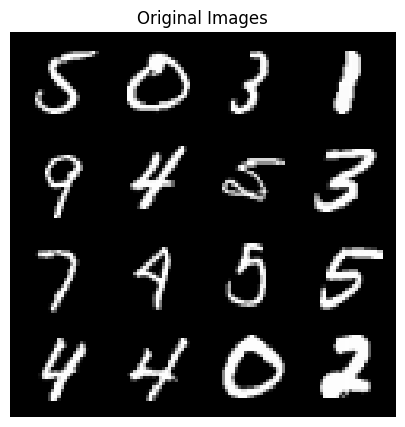

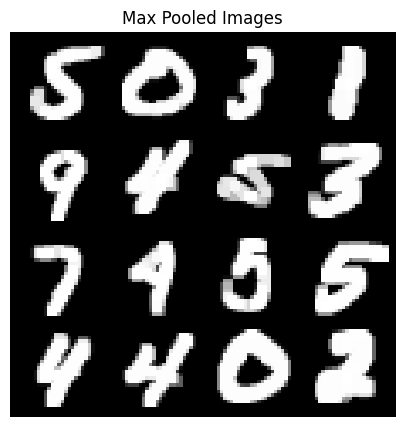

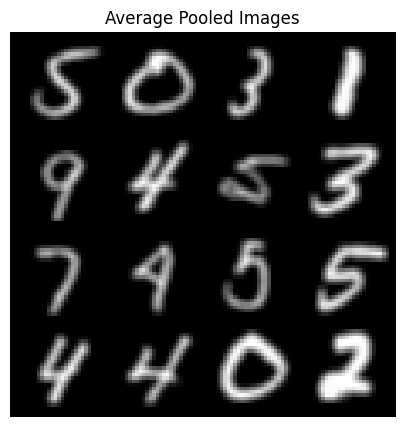

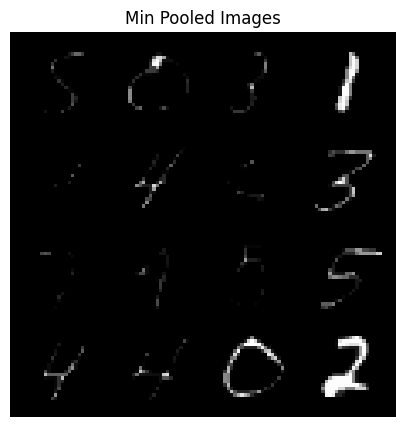

In [6]:

max_pooled_images = torch.nn.MaxPool2d(3, stride=1)(images)

avg_pooled_images = torch.nn.AvgPool2d(3, stride=1)(images)

min_pooled_images = -torch.nn.MaxPool2d(3, stride=1)(-images)

def show_images(images, title):
    grid = make_grid(images, nrow=4)
    gridd  = grid.numpy().transpose((1, 2, 0))
    plt.figure(figsize=(10, 5))
    plt.imshow(gridd)
    plt.title(title)
    plt.axis('off')
    plt.show()

show_images(images, 'Original Images')

show_images(max_pooled_images, 'Max Pooled Images')

show_images(avg_pooled_images, 'Average Pooled Images')

show_images(min_pooled_images, 'Min Pooled Images')

## Question 3

In [2]:
from torch.utils.data import random_split
from torch.utils.data import random_split
transformations = Compose([ToTensor()])
training_data = datasets.FashionMNIST(
    ".", 
    download=True, 
    train=True, 
    transform=transformations
)
test_data = datasets.FashionMNIST(
    ".", 
    download=True, 
    train=False, 
    transform=transformations  
)

On remarque en affichant une image, que la data est bien normalisée.

In [4]:
print(training_data[1][0]) 

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
          0.0000, 0.0000, 0.1608, 0.7373, 0.4039, 0.2118, 0.1882, 0.1686,
          0.3412, 0.6588, 0.5216, 0.0627, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.1922,
          0.5333, 0.8588, 0.8471, 0.8941, 0.9255, 1.0000, 1.0000, 1.0000,
          1.0000, 0.8510, 0.8431, 0.9961, 0.9059, 0.6275, 0.1765, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0549, 0.6902, 0.8706,
          0.8784, 0.8314, 0.7961, 0.7765, 0.7686, 0.7843, 0.8431, 0.8000,
          0.7922, 0.7882, 0.7882, 0.7882, 0.8196, 0.8549, 0.8784, 0.6431,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7373, 0.8588, 0.7843,
          0.7765, 0.7922, 0.7765, 0.7804, 0.7804, 0.7882, 0.7686, 0.7765,
          0.7765, 0.7843, 0.7843, 0.7843, 0.7843, 0.7882,

## First CNN architectures

## Question 4
In this exercise, we will create a simple convolutional network and manipulate it to see the effect of different hyperparameters. We will implement different versions of the given architecture (given as an image)

Contrary to the dense (linear) layers that we used in the previous TDs, convolutional layers are applied to tensors of more than one dimension, which we may see stacks of images.

On the following diagram, the sizes of the outputs of each layer are represented as d@hxw, where d, h et w represent the depth, height and width respectively. We will the use the nn.Conv2d to apply the convolutions.

4/ Implement and train this network on the FashionMNIST dataset, using a kernel of size 5x5. The input images must be normalized. You will train with a 1e-3 learning rate, 5 epochs and the nn.CrossEntropyLoss() cost function. Modify the padding and the stride in order to obtain exactly the output image's sizes on the diagram.
Note that to apply a dense (linear) layer on the output of a convolutional layer, one must change the dimension of the data, you can use .view() for this.


In [9]:
model_TD3_cnn = torch.nn.Sequential(
    torch.nn.Conv2d(1, 4, kernel_size=5, stride=3, padding=11),
    torch.nn.MaxPool2d(3, stride=1),
    torch.nn.Conv2d(4, 8, kernel_size=5, stride=3, padding=8),
    torch.nn.MaxPool2d(3, stride=1),
    torch.nn.Conv2d(8, 16, kernel_size=5, stride=1, padding=2),
    torch.nn.Flatten(),
    torch.nn.Linear(784, 10),
    torch.nn.LogSoftmax(dim=1)
)


We recall the trainer function and success_rate calculator from TD  2

In [3]:
def trainer_vector(dataset, model, loss_fn, epoch=10, batch_size=1, rate=1e-4):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=rate)
    batch = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    losses = []
    for e in range(epoch):
        for x, y in tqdm(batch, desc=f"epoch {e+1}/{epoch}"):
            x = x.to(device)
            y = y.to(device)
            optimizer.zero_grad()
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            loss.backward()
            optimizer.step()
        losses.append(loss.item())
    return losses


In [11]:
trainer_vector(training_data,model_TD3_cnn,torch.nn.CrossEntropyLoss(),epoch=5,batch_size=64,rate=1e-3)

epoch 1/5:   0%|          | 0/938 [00:00<?, ?it/s]

/Data/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1708025842427/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


epoch 2/5:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 3/5:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 4/5:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 5/5:   0%|          | 0/938 [00:00<?, ?it/s]

[0.4334839880466461,
 0.264987051486969,
 0.15118743479251862,
 0.25030237436294556,
 0.37853917479515076]

In [4]:
def success_rate_vector(model,test_data):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    success = 0
    test_data = DataLoader(test_data, batch_size=1, shuffle=True)
    for x, y in test_data:
        x = x.to(device)
        y = y.to(device)
        if torch.argmax(model(x)) == y:
            success += 1
    return success/len(test_data)

In [13]:
print(f"Success rate: {success_rate_vector(model_TD3_cnn, test_data)*100}%")

Success rate: 85.71%


## Question 5 : Influence of the size of the filters
5/ Implement and train the same network using convolutionnal filters of half the depth : depths 2, 4, and 8 instead of 4, 8 and 16. What happens ?

In [14]:
model_TD3_cnn2 = torch.nn.Sequential(
    torch.nn.Conv2d(1, 2, kernel_size=5, stride=3, padding=11),
    torch.nn.MaxPool2d(3, stride=1),
    torch.nn.Conv2d(2, 4, kernel_size=5, stride=3, padding=8),
    torch.nn.MaxPool2d(3, stride=1),
    torch.nn.Conv2d(4, 8, kernel_size=5, stride=1, padding=2),
    torch.nn.Flatten(),
    torch.nn.Linear(392, 10),
    torch.nn.LogSoftmax(dim=1)
)

In [15]:
trainer_vector(training_data,model_TD3_cnn2,torch.nn.CrossEntropyLoss(),epoch=5,batch_size=64,rate=1e-3)

epoch 1/5:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 2/5:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 3/5:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 4/5:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 5/5:   0%|          | 0/938 [00:00<?, ?it/s]

[0.5726942420005798,
 0.33216679096221924,
 0.606910765171051,
 0.6699548363685608,
 0.5941449403762817]

In [16]:
print(f"Success rate: {success_rate_vector(model_TD3_cnn2, test_data)*100}%")

Success rate: 83.71%


## Question 6
6/ Implement and train the same network using filters of smaller size : 3x3 instead of 5x5. What happens ?


In [17]:
model_TD3_cnn3 = torch.nn.Sequential(
    torch.nn.Conv2d(1, 2, kernel_size=5, stride=3, padding=11),
    torch.nn.MaxPool2d(3, stride=1),
    torch.nn.Conv2d(2, 4, kernel_size=5, stride=2, padding=3),
    torch.nn.MaxPool2d(2, stride=1),
    torch.nn.Conv2d(4, 8, kernel_size=5, stride=1, padding=2),
    torch.nn.Flatten(),
    torch.nn.Linear(392, 10),
    torch.nn.LogSoftmax(dim=1)
)

In [5]:
plt.plot(trainer_vector(training_data,model_TD3_cnn3,torch.nn.CrossEntropyLoss(),epoch=5,batch_size=64,rate=1e-3))
plt.show()

NameError: name 'model_TD3_cnn3' is not defined

In [19]:
print(f"Success rate: {success_rate_vector(model_TD3_cnn3, test_data)*100}%")

Success rate: 82.25%


## Question 7 : Influence of the depth of the network
7/ Compute the number of parameters of the first nework of the exercise and the number of parameters of the second given network.


The first model has a total number of : 104 + 808 + 3216 + 7840 + 10  = 11978 parameters <br>

The below model has : 104 + 31360 + 10 = 31474 parameters

## Question 8
8/ Implement and train this network.

In [20]:
model_TD3_cnn4 = torch.nn.Sequential(
    torch.nn.Conv2d(1, 4, kernel_size=5, stride=3, padding=29),
    torch.nn.Flatten(),
    torch.nn.Linear(3136, 10),
    torch.nn.LogSoftmax(dim=1)
)

In [21]:
trainer_vector(training_data,model_TD3_cnn4,torch.nn.CrossEntropyLoss(),epoch=5,batch_size=64,rate=1e-3)

epoch 1/5:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 2/5:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 3/5:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 4/5:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 5/5:   0%|          | 0/938 [00:00<?, ?it/s]

[0.36258772015571594,
 1.1704479455947876,
 0.2898224890232086,
 0.4141814708709717,
 0.41248026490211487]

In [22]:
print(f"Success rate: {success_rate_vector(model_TD3_cnn4, test_data)*100}%")

Success rate: 83.66%


## Question 9 : LeNet
9/ Implement LeNet and train it on the FashionMNIST dataset. The input images must be normalized.

In [99]:
model_TD3_LE = torch.nn.Sequential(
    torch.nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2), #torch.nn.Sigmoid(),
    torch.nn.MaxPool2d(2, stride=2),
    torch.nn.Conv2d(6, 16, kernel_size=5, stride=2, padding=5), #torch.nn.Sigmoid(),
    torch.nn.MaxPool2d(2, stride=2),
    torch.nn.Flatten(),
    torch.nn.Linear(400, 120), #torch.nn.Sigmoid(),
    torch.nn.Linear(120,84), #torch.nn.Sigmoid(),
    torch.nn.Linear(84,10), #torch.nn.Sigmoid(),
    torch.nn.LogSoftmax(dim=1)
)

epoch 1/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 2/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 3/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 4/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 5/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 6/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 7/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 8/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 9/10:   0%|          | 0/938 [00:00<?, ?it/s]

epoch 10/10:   0%|          | 0/938 [00:00<?, ?it/s]

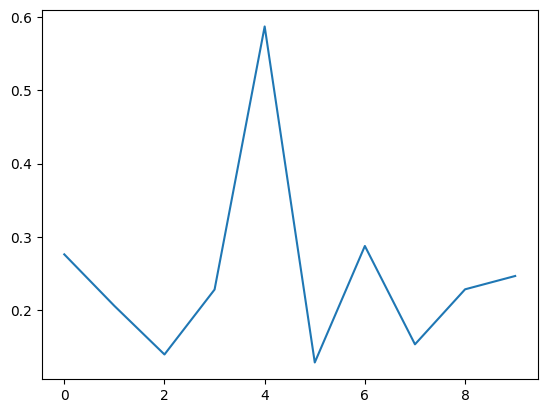

In [101]:
plt.plot(trainer_vector(training_data,model_TD3_LE,torch.nn.CrossEntropyLoss(),epoch=10,batch_size=64,rate=1e-3))
plt.show()

In [102]:
print(f"Success rate: {success_rate_vector(model_TD3_LE, test_data)*100}%")

Success rate: 88.77000000000001%


## Question 10

In [186]:


import torch
import torch.nn as nn
LeNet = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2),  # Adjusted for a 28x28 input to output 28x28
    #nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),  # Outputs 14x14
    nn.Conv2d(6, 16, kernel_size=5, stride=1),  # Outputs 10x10
    #nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),  # Outputs 5x5
    nn.Flatten(),
    nn.Linear(16 * 5 * 5, 120),  # Adjusted for the output from the last conv layer
    nn.ReLU(),
    nn.Linear(120, 84),
    nn.ReLU(),
    nn.Linear(84, 10),
    nn.LogSoftmax(dim=1)
)
 


epoch 1/15:   0%|          | 0/6000 [00:00<?, ?it/s]

epoch 2/15:   0%|          | 0/6000 [00:00<?, ?it/s]

epoch 3/15:   0%|          | 0/6000 [00:00<?, ?it/s]

epoch 4/15:   0%|          | 0/6000 [00:00<?, ?it/s]

epoch 5/15:   0%|          | 0/6000 [00:00<?, ?it/s]

epoch 6/15:   0%|          | 0/6000 [00:00<?, ?it/s]

epoch 7/15:   0%|          | 0/6000 [00:00<?, ?it/s]

epoch 8/15:   0%|          | 0/6000 [00:00<?, ?it/s]

epoch 9/15:   0%|          | 0/6000 [00:00<?, ?it/s]

epoch 10/15:   0%|          | 0/6000 [00:00<?, ?it/s]

epoch 11/15:   0%|          | 0/6000 [00:00<?, ?it/s]

epoch 12/15:   0%|          | 0/6000 [00:00<?, ?it/s]

epoch 13/15:   0%|          | 0/6000 [00:00<?, ?it/s]

epoch 14/15:   0%|          | 0/6000 [00:00<?, ?it/s]

epoch 15/15:   0%|          | 0/6000 [00:00<?, ?it/s]

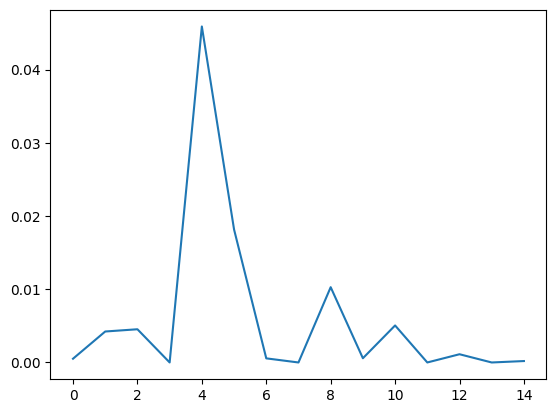

In [196]:
plt.plot(trainer_vector(training_data,LeNet,torch.nn.CrossEntropyLoss(),epoch=15,batch_size=10,rate=1e-5))
plt.show()

In [197]:
print(f"Success rate: {success_rate_vector( LeNet, test_data)*100}%")

Success rate: 90.10000000000001%


In [174]:
import torch
import cloudpickle as pickle

def torch_saver(net, file):
    
    net_cpu = net.to('cpu')
    
    with open(file, 'wb') as f:
        pickle.dump(net_cpu, f)
    
    print(f"Model saved as {file}")



In [200]:
torch_saver(LeNet, 'LeNet.pkl')

Model saved as LeNet.pkl


In [201]:
import os
file_path = "/users/eleves-b/2021/ossama.faraji/Desktop/Hala Modal/LeNet.pkl"
file_size = os.path.getsize(file_path)

print(f"The size of the file is {file_size} bytes.")

The size of the file is 252507 bytes.
